In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = ['AAPL'], start = '2012-03-11',end = '2022-07-10')
data.head(10)
print(data.shape)

[*********************100%%**********************]  1 of 1 completed
(2599, 6)


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

# target is next week's closing price
data['TargetNextClose'] = data['Adj Close'].shift(-7)

# Display the resulting DataFrame
data.dropna(inplace=True)

# Resample to weekly frequency and calculate the mean
# df_weekly = data.resample('W').mean()

# Reset index to make 'date' a column again
# df_weekly.reset_index(inplace=True)
# df_weekly.dropna(inplace=True)
# df_weekly.reset_index(inplace = True)

data.reset_index(inplace = True)

# Target column Categories
# data['y'] =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
# data['yi'] = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
# print(len(yi))

data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
# df_weekly.drop(['index', 'Volume', 'Close'], axis=1, inplace=True)
print(data.shape)
# print(df_weekly.head())

(2443, 11)


In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))
# data_set.reset_index(inplace = True, drop=True)
# data_set.head()
# data_set.to_csv('stocks.csv', index=False)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,23.089287,23.114286,22.432142,19.096918,35.875684,23.552655,22.673908,21.845652,-3.338421,0,19.277212
1,22.484285,22.692142,22.332144,19.145864,36.765282,23.451416,22.670259,21.854182,-3.284519,0,18.648756
2,22.583929,22.683214,22.280357,19.299410,39.582099,23.376995,22.670254,21.864988,-2.935402,0,18.754255
3,22.691786,23.225000,22.535713,19.756384,47.096862,23.360785,22.680879,21.882760,-3.575035,0,18.532608
4,23.173929,23.313929,23.000000,19.598894,45.028756,23.328499,22.687629,21.897846,-3.607548,0,18.364166
5,22.842501,22.930714,22.500000,19.234953,40.613280,23.258574,22.685781,21.907071,-3.995770,0,18.100266
6,22.537500,22.563213,21.772142,18.541731,33.841003,23.117758,22.667845,21.905388,-2.594931,0,18.137358
7,21.872143,22.692142,21.812857,19.277212,44.383315,23.072631,22.667371,21.915170,-3.886957,0,17.537180
8,22.535713,22.639286,21.846430,18.648756,38.732730,22.961496,22.652289,21.915044,-3.440031,0,17.774940
9,22.194286,22.376785,21.808571,18.754255,40.104305,22.872748,22.639959,21.916562,-3.610249,0,17.721121


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

c:\users\jonat\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[[0.05470759 0.05242742 0.05248086 ... 0.32424774 0.         0.04334273]
 [0.05112291 0.04992461 0.05187615 ... 0.32731762 0.         0.03960095]
 [0.0517133  0.04987168 0.05156299 ... 0.34720104 0.         0.04022909]
 ...
 [0.74682103 0.75674189 0.76204365 ... 0.38590765 0.         0.77219977]
 [0.76341129 0.76610938 0.76930024 ... 0.18008856 0.         0.79244654]
 [0.76003403 0.76569432 0.74722809 ... 0.54713369 1.         0.79651942]]


In [5]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30 # Number of days (or weeks) want to look back
print(data_set_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]): #backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# make sure the shape is correct
print(X)
print(X.shape)
# print(y)
print(y.shape)


2443
[[[0.05470759 0.05242742 0.05248086 ... 0.05398809 0.04605846 0.03773333]
  [0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  ...
  [0.03730265 0.03552402 0.03703896 ... 0.03403626 0.04067667 0.03556804]
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]]

 [[0.05112291 0.04992461 0.05187615 ... 0.05335498 0.04603413 0.03779186]
  [0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.05308381 0.05310717 ... 0.0527882  0.04610494 0.03798794]
  ...
  [0.03792055 0.03650439 0.03833479 ... 0.03406514 0.04048441 0.03546631]
  [0.03976791 0.04031575 0.04073422 ... 0.03447478 0.04038098 0.03542446]
  [0.04265638 0.04040468 0.04211427 ... 0.03474437 0.04025721 0.03536773]]

 [[0.0517133  0.04987168 0.05156299 ... 0.05288957 0.0460341  0.037866  ]
  [0.05235236 0.0

In [6]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [7]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1930
(1930, 30, 8)
(483, 30, 8)
(1930, 1)
(483, 1)


In [8]:
!pip install --upgrade tensorflow-probability


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print(type(X_train))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
# inputs = LSTM(150, name='first_layer')(lstm_input)
# inputs = Dense(1, name='dense_layer')(inputs)
# output = Activation('linear', name='output')(inputs)
# model = Model(inputs=lstm_input, outputs=output)
# adam = optimizers.Adam()
# model.compile(optimizer=adam, loss='mse')

def negative_log_likelihood(y_true, y_pred):
    return -tf.reduce_mean(y_pred.log_prob(y_true))

model = Sequential()
model.add(LSTM(150, name='first_layer', return_sequences=True, input_shape = (backcandles, 8)))
model.add(LSTM(150, name='second_layer'))
model.add(Dense(2, activation='relu')) # 2 as you want to predict mean and variance
model.add(tfp.layers.DistributionLambda(
        lambda t: tfp.distributions.Normal(loc=t[..., :1], scale=1e-3 + tf.math.softplus(0.01 * t[..., 1:]))
    )) # note this
opt = keras.optimizers.Adam(learning_rate=0.001)
# negloglik = lambda y, p_y: -p_y.log_prob(y) # note this
model.compile(optimizer='adam', loss=negative_log_likelihood)
model.summary()




<class 'numpy.ndarray'>


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (LSTM)          (None, 30, 150)           95400     
                                                                 
 second_layer (LSTM)         (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                                 
Total params: 276302 (1.05 MB)
Trainable params: 276302 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# model.fit(x=X_train, y=y_train, batch_size=15, epochs=15, shuffle=True, validation_split = 0.1)
model.fit(x=X_train, y=y_train, batch_size=32, epochs=15, validation_split=0.1,verbose=1)


Epoch 1/15

55/55 [==============================] - 6s 48ms/step - loss: 0.5547 - val_loss: 0.5565
Epoch 2/15
55/55 [==============================] - 2s 33ms/step - loss: 0.5540 - val_loss: 0.5573
Epoch 3/15
55/55 [==============================] - 2s 32ms/step - loss: 0.5540 - val_loss: 0.5556
Epoch 4/15
55/55 [==============================] - 2s 32ms/step - loss: 0.5540 - val_loss: 0.5561
Epoch 5/15
55/55 [==============================] - 2s 37ms/step - loss: 0.5540 - val_loss: 0.5555
Epoch 6/15
55/55 [==============================] - 2s 35ms/step - loss: 0.5540 - val_loss: 0.5550
Epoch 7/15
55/55 [==============================] - 2s 34ms/step - loss: 0.5540 - val_loss: 0.5547
Epoch 8/15
55/55 [==============================] - 2s 37ms/step - loss: 0.5540 - val_loss: 0.5556
Epoch 9/15
55/55 [==============================] - 2s 37ms/step - loss: 0.5540 - val_loss: 0.5549
Epoch 10/15
55/55 [==============================] - 2s 36ms/step - loss: 0.5540 - val_loss: 0.5547
Epoch 11

In [11]:
y_pred = model.predict(X_test)

#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 2s 17ms/step
[0.25272852] [0.57752285]
[0.44569308] [0.58695519]
[0.5891531] [0.56737494]
[0.32642117] [0.58860525]
[-0.440853] [0.6002862]
[0.47607672] [0.59968755]
[-0.19177121] [0.59793547]
[0.32853222] [0.60351314]
[0.08837727] [0.60436]
[-1.5034859] [0.61935561]


[0.6527294]


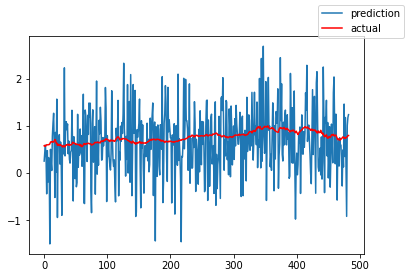

In [12]:
mean = lambda x: x.mean() # multiply by the scaling factor if you used a scaler
sd = lambda x: x.std() 

print(y_pred.mean().flatten())

def conf_int(pred):
    """95% confidence interval"""
    return np.array([mean(pred) - 2*sd(pred), mean(pred) + 2*sd(pred)])
                    
# def conf_int(pred):
#     """95% confidence interval"""
#     print(sd(pred))
#     return 1.96*sd(pred)[0]

ci = conf_int(y_pred)
# ci = list(map(lambda x: conf_int(x), y_pred))
# print(ci[:10])
# plt.figure(figsize=(16,8))
# plt.plot(y_test, color = 'black', label = 'Test')
# plt.plot(y_pred, color = 'green', label = 'pred')
# plt.legend()
# plt.title('Predicted change in price v.s actual change in price')
# plt.show()
# print(y_pred-ci)
fig, ax = plt.subplots()
x_cords = np.arange(len(y_pred))
ax.plot(x_cords,y_pred, label='prediction')
ax.plot(x_cords,y_test, label='actual', color='r')
fig.legend()
# ax.fill_between(x_cords, ci[:,0], ci[:,1], color='b', alpha=.1)